## Découverte : manipulation des fichiers csv

# Lire un fichier à l'aide de la fonction Reader()

In [2]:
import csv;
f= open (r"C:\Users\chikr\Downloads/data.csv")
myReader = csv.reader(f)
for row in myReader:
print(row)

['Langage de programmation;Créé par ;apparu;Extension']
['Python;Guido van Rossum;1991;.py']
['JavaScript;Brendan Eich; 1995;.js']
['PHP;Ramsus Ledorf;1994;.php']


- Import module csv
- Ouverture en mode lecture "r" en variable f
- Création variable myReader avec fonction .reader de f
- affichage

# Lire un fichier comme un dictionnaire à l'aide de la fonction Reader()

In [8]:
reader = csv.DictReader(open(r"C:\Users\chikr\Downloads/data.csv"))
for raw in reader:
    print(raw)

{'Langage de programmation;Créé par ;apparu;Extension': 'Python;Guido van Rossum;1991;.py'}
{'Langage de programmation;Créé par ;apparu;Extension': 'JavaScript;Brendan Eich; 1995;.js'}
{'Langage de programmation;Créé par ;apparu;Extension': 'PHP;Ramsus Ledorf;1994;.php'}


# Créer un fichier CSV à l'aide de la fonction CSV

In [7]:
with open('data2.csv','w',newline='') as fichiercsv:
    writer=csv.writer(fichiercsv)
    writer.writerow(['Nom', 'Prénom', 'E-mail', 'Télephone'])
    writer.writerow(['Depond', 'Marcel', 'Marcel@gmail.com', '1020304050'])
    writer.writerow(['Alicat', 'Patricia', 'Alicatpa@gmail.com', '1224455660'])
    writer.writerow(['Muller', 'Antoni', 'Antoni.muller@gmail.com', '1669988445'])
    writer.writerow(['Massont', 'Rodulf', 'Massant.rodulf@gmail.com', '1669988444']) 

# Ecrire un fichier CSV existant

In [20]:
import csv

with open('data2.csv', 'a', newline='', encoding='utf-8') as fichiercsv:
    writer = csv.writer(fichiercsv)
    writer.writerow(['modifier', 'csv', 'existant@mail.fr', '1669987744'])

## Utilisation de la méthode .readlines() avec une boucle FOR

In [4]:
filin = open("C:\\Users\\chikr\\Downloads\\zoo.txt","r")
lignes = filin.readlines()
for ligne in lignes:
     print(ligne)

filin.close()


girafe

tigre

singe

souris


- Ouverture du fichier en lecture "r" en variable filin
- Nouvelle variable lignes qui affecte .readlines à filin
- Affichage

## Utilisation de la méthode .readlines() avec une boucle WHILE

In [14]:
with open("C:\\Users\\chikr\\Downloads\\zoo.txt", "r") as filin:
    ligne = filin.readline()
    while ligne != "":
            print(ligne)
            ligne = filin.readline()

girafe

tigre

singe

souris


## Utilisation de la méthode .read()

In [9]:
with open("C:\\Users\\chikr\\Downloads\\zoo.txt", "r") as filin:
    afficher = filin.read()
    print(afficher)

girafe
tigre
singe
souris


## Ecrire dans un fichier méthode .write

In [15]:
animaux2 = ["poisson", "abeille", "chat"]
with open("C:\\Users\\chikr\\Downloads\\zoo.txt", "w") as filout:
     for animal in animaux2:
             filout.write(animal)

- Création d'une liste
- Ouverture du fichier en mode écriture "write" en variable filout
- Nouvelle variable animal
- écrire dans filou la variable animal



## Lecture de fichier avec Pandas

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Réparation des "extentions" manquantes : 

In [22]:
pip install xlrd>=2.0.1

Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda install -c conda-forge xlrd>=2.0.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('C:\\Users\\chikr\\Downloads\\titanic.xls')

In [4]:
data.shape #dimension du fichier

(1309, 14)

In [11]:
data.columns #affichage des colonnnes

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
data.head #afficher le header

In [13]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket',
                  'fare', 'cabin', 'embarked', 'boat',
                  'body', 'home.dest'], axis=1)

#suppression des datas inutiles en colonne avec l'axe 1

In [14]:
data.describe() #avoir les statistiques de base

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [16]:
data = data.dropna(axis=0) #supression des lignes avec l'axe 0

In [19]:
data['pclass'].value_counts() #trie par colonne

pclass
3    501
1    284
2    261
Name: count, dtype: int64

<Axes: xlabel='pclass'>

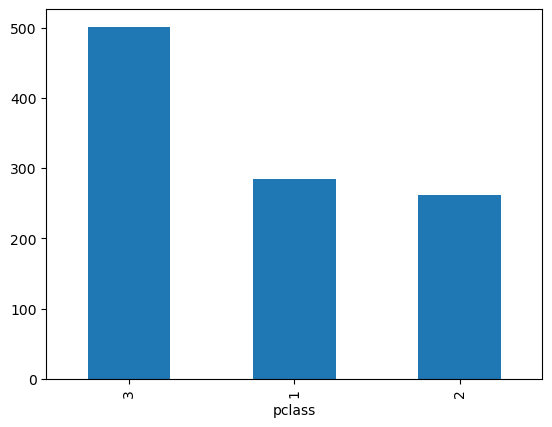

In [21]:
data['pclass'].value_counts().plot.bar() #affichage des résultats

In [22]:
data.groupby(["sex"]).mean() #moyenne par groupe de sex

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [23]:
data.groupby(["sex", "pclass"]).mean() #moyenne par groupe de sex et classe

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [25]:
data['age'] < 18 #Classement booléen des majeurs et mineurs

0       False
1        True
2        True
3       False
4       False
        ...  
1301    False
1304     True
1306    False
1307    False
1308    False
Name: age, Length: 1046, dtype: bool

In [29]:
data[data["age"] < 18].groupby(['sex','pclass']).mean()
#moyenne par sexe et classe en fonction de l'age

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

## Exercice video : 
Modifier le contenue de la colonne age, pour créer 4 catégories d'age :
- Moins de 20
- de 20 à 30
- de 30 à 40
- 40 et plus

In [52]:
moinsde20 = data['age'] < 20
de20a30 = (data['age'] > 20) & (data['age']< 30)
de30a40 = (data['age'] > 30) & (data['age']< 40)
de40etplus = (data['age'] >= 40)

data['ageparcategorie'] = 0 #nouvelle catégorie

data.loc[moinsde20, 'ageparcategorie'] = 1
data.loc[de20a30, 'ageparcategorie'] = 2
data.loc[de30a40, 'ageparcategorie'] = 3
data.loc[de40etplus, 'ageparcategorie'] = 4


data.head()

,pclass,survived,sex,age,ageparcategorie
0,1,1,female,29.0000,2
1,1,1,male,0.9167,1
2,1,0,female,2.0000,1
3,1,0,male,30.0000,0
4,1,0,female,25.0000,2


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('C:\\Users\\chikr\\Downloads\\titanic.xls')

moinsde20 = data['age'] < 20
de20a30 = (data['age'] > 20) & (data['age']< 30)
de30a40 = (data['age'] > 30) & (data['age']< 40)
de40etplus = (data['age'] >= 40)

data['ageparcategorie'] = 0 #nouvelle catégorie

data.loc[moinsde20, 'ageparcategorie'] = 1
data.loc[de20a30, 'ageparcategorie'] = 2
data.loc[de30a40, 'ageparcategorie'] = 3
data.loc[de40etplus, 'ageparcategorie'] = 4

def agecat(ageparcategorie):
    if ageparcategorie == 1 :
        return 'moins de 20'
    elif ageparcategorie == 2 :
        return 'entre 20 et 30'
    elif ageparcategorie == 3 :
        return 'entre 30 et 40'
    elif ageparcategorie == 4 :
        return 'plus de 40'
    else:
        return 'Categorie impossible, il y a des lettres'
    
data['age'].map(agecat)


0       Categorie impossible, il y a des lettres
1       Categorie impossible, il y a des lettres
2                                 entre 20 et 30
3       Categorie impossible, il y a des lettres
4       Categorie impossible, il y a des lettres
                          ...                   
1304    Categorie impossible, il y a des lettres
1305    Categorie impossible, il y a des lettres
1306    Categorie impossible, il y a des lettres
1307    Categorie impossible, il y a des lettres
1308    Categorie impossible, il y a des lettres
Name: age, Length: 1309, dtype: object